In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
m, c = 4, 100

In [45]:
X = np.linspace(-10, 100, 100)

noise = np.random.randn(100) * 2000

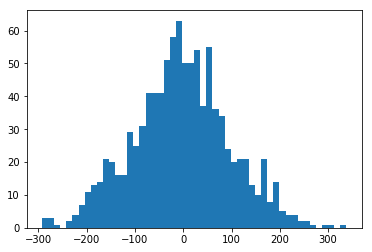

In [46]:
data = np.random.randn(1000) * 100

out = plt.hist(data, bins=50)

In [47]:
y = m * X * X + c + noise

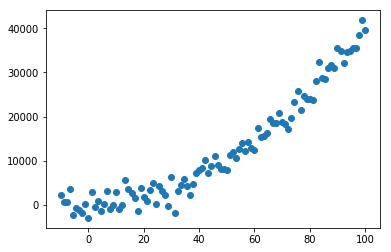

In [48]:
plt.scatter(X, y)

In [49]:
X_mod = (X - X.mean()) / X.std()
y_mod = (y - y.mean()) / y.std()

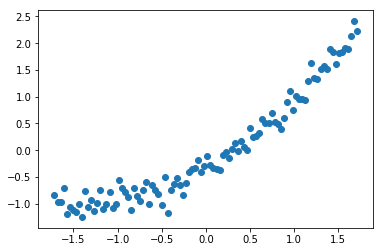

In [50]:
plt.scatter(X_mod, y_mod)

In [51]:
class CustomLinearReg:
    
    def __init__(self, lr=.1, iters=10):
        self.lr = lr
        self.iters = iters
    
    def fit(self, X, y):
        self.a_ = np.random.random()
        self.b_ = np.random.random()
        self.c_ = np.random.random()
        
        errors = []
        for i in range(self.iters):
            error = self.gradient_decend(X, y)
            errors.append(error)
        
        return errors
    
    def gradient_decend(self, X, y):
        delta_a, delta_b, delta_c, error = self.gradient(X, y)
#         print(delta_coef, delta_bias)
        self.a_ += delta_a
        self.b_ += delta_b
        self.c_ += delta_c
        return error
        
    def gradient(self, X, y):
        yh = self.hypo(X)
        dmseda = np.mean(2 * (yh-y) * X * X)
        dmsedb = np.mean(2 * (yh-y) * X)
        dmsedc = np.mean(2 * (yh-y))
        delta_a = -dmseda * self.lr
        delta_b = -dmsedb * self.lr
        delta_c = -dmsedc * self.lr
        error = np.mean((yh-y)**2)
        return delta_a, delta_b, delta_c, error
        
    def hypo(self, X):
        return X * X * self.a_ + X * self.b_ + self.c_

In [52]:
# for i in range(5, 15):

#     model = CustomLinearReg(lr=.0001*i, iters=30)
#     errors = model.fit(X, y)
    
#     plt.figure()
#     plt.title(str(.0001*i))
#     plt.plot(errors)
#     plt.show()

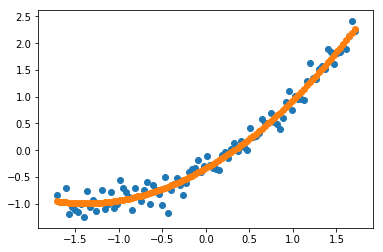

In [54]:
model = CustomLinearReg(lr=.001, iters=10000)
errors = model.fit(X_mod, y_mod)

yh = model.hypo(X_mod)

plt.scatter(X_mod, y_mod)
plt.scatter(X_mod, yh)

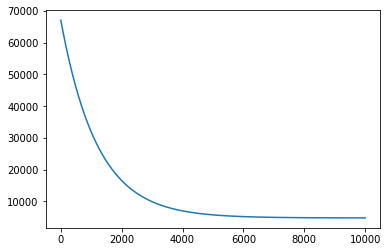

In [28]:
plt.plot(errors)